<a href="https://colab.research.google.com/github/shriarul5273/CNN-Keras-Practice/blob/main/Basics/FC_mnist_fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Key Details 
```
    DataSet: MNIST from inbuilt in Keras
    Deep learning Framework: Tensorflow with Keras
    Deep learning Method: Fully Connected only
    Optimizer:SGD with 0.01
    Results: 86 to 88 % Accurate
```
#### Done by shriarul643@gmail.com

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(trainData,trainLabel),(testData,testLabel) = fashion_mnist.load_data()
print(trainData.shape)

4423680/4422102 [==============================] - 0s 0us/step
(60000, 28, 28)


In [3]:
le = LabelBinarizer()
trainLabel = le.fit_transform(trainLabel)
testLabel = le.fit_transform(testLabel)

In [4]:
trainData = trainData.reshape(trainData.shape[0],trainData.shape[1]*trainData.shape[2])
testData = testData.reshape(testData.shape[0],testData.shape[1]*testData.shape[2])
trainData = trainData.astype('float32')/255.0
testData = testData.astype('float32')/255.0


In [5]:
TargetLabels= ['T-shirt/top','Trouser','Pullover','Dress','Coat',
               'Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [6]:
trainData.shape

(60000, 784)

In [7]:
model = Sequential([Dense(256,activation='relu',input_shape=(trainData.shape[1],)),
                    Dense(128,activation='relu'),
                    Dense(64,activation='sigmoid'),
                    Dense(10,activation='softmax')])

In [8]:
model.compile(loss='categorical_crossentropy',metrics=['accuracy'],optimizer=SGD(0.01))
H = model.fit(trainData,trainLabel,validation_data=(testData,testLabel),epochs=50,batch_size=32,verbose=1)

Epoch 1/50
1875/1875 [==============================] - 7s 2ms/step - loss: 1.6423 - accuracy: 0.5314 - val_loss: 0.7572 - val_accuracy: 0.7449
Epoch 2/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6977 - accuracy: 0.7647 - val_loss: 0.5951 - val_accuracy: 0.7924
Epoch 3/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5572 - accuracy: 0.8101 - val_loss: 0.5290 - val_accuracy: 0.8134
Epoch 4/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4939 - accuracy: 0.8261 - val_loss: 0.4937 - val_accuracy: 0.8257
Epoch 5/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4636 - accuracy: 0.8379 - val_loss: 0.4756 - val_accuracy: 0.8286
Epoch 6/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4395 - accuracy: 0.8433 - val_loss: 0.4617 - val_accuracy: 0.8378
Epoch 7/50
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4223 - accuracy: 0.8488 - val_loss: 0.4508 - val_accuracy:

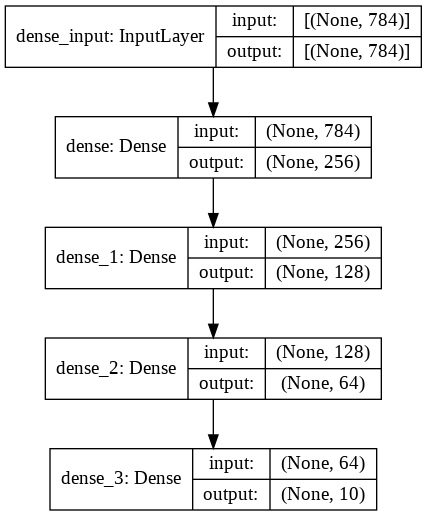

In [9]:
plot_model(model,show_shapes=True)

In [10]:
plt.style.use('ggplot')

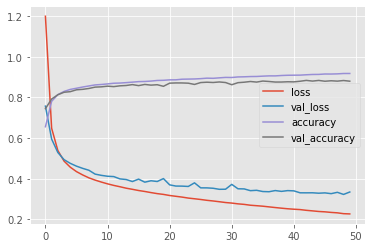

In [11]:
plt.figure()
plt.plot(np.arange(max(H.epoch)+1),H.history['loss'],label='loss')
plt.plot(np.arange(max(H.epoch)+1),H.history['val_loss'],label='val_loss')
plt.plot(np.arange(max(H.epoch)+1),H.history['accuracy'],label='accuracy')
plt.plot(np.arange(max(H.epoch)+1),H.history['val_accuracy'],label='val_accuracy')

plt.legend()
plt.show()

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                650       
Total params: 242,762
Trainable params: 242,762
Non-trainable params: 0
_________________________________________________________________


In [13]:
predicted = model.predict(testData,batch_size=128,verbose=1)

79/79 [==============================] - 0s 1ms/step


In [14]:
print(classification_report(testLabel.argmax(axis=1),predicted.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.76      0.90      0.83      1000
           1       0.98      0.97      0.98      1000
           2       0.79      0.81      0.80      1000
           3       0.90      0.86      0.88      1000
           4       0.79      0.82      0.80      1000
           5       0.96      0.96      0.96      1000
           6       0.76      0.63      0.69      1000
           7       0.96      0.92      0.94      1000
           8       0.98      0.96      0.97      1000
           9       0.93      0.97      0.95      1000

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



In [15]:
_,acc = model.evaluate(testData,testLabel)
print('Accuracy is {:.2f}%'.format(acc*100))

313/313 [==============================] - 1s 2ms/step - loss: 0.3344 - accuracy: 0.8802
Accuracy is 88.02%


In [16]:
predicted[5]

array([4.1626053e-04, 9.9938750e-01, 2.6262500e-05, 6.4564018e-05,
       2.5197647e-05, 6.5398504e-05, 1.2365262e-05, 1.0163885e-06,
       1.4940251e-07, 1.2657401e-06], dtype=float32)

In [17]:
print('Predicted Label : {} \nActual Label : {}'.format(np.argmax(predicted[5]),np.argmax(testLabel[5])))

Predicted Label : 1 
Actual Label : 1


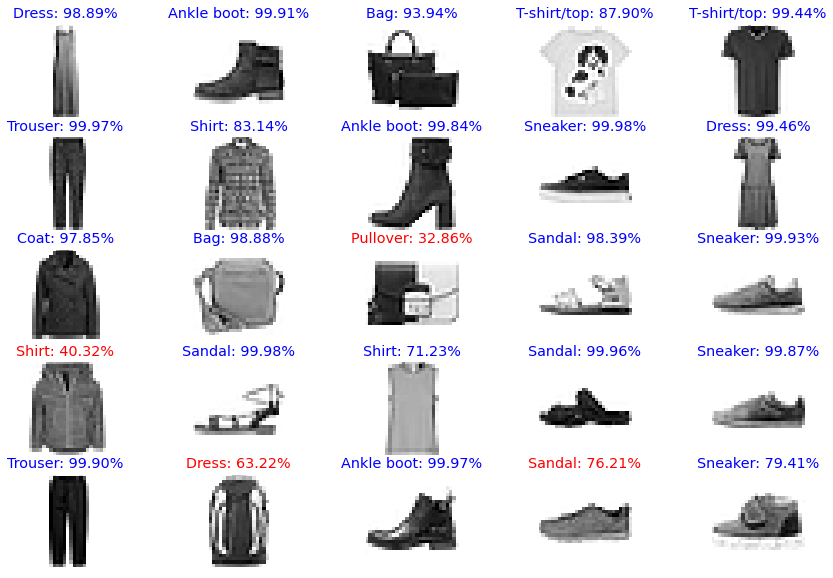

In [18]:
RandomImageIndex = np.random.randint(0,len(testData),(25,))
plt.figure(figsize=(15,10))
for i,j in enumerate(RandomImageIndex):
  plt.subplot(5,5,i+1)
  plt.imshow(testData[j].reshape(28,28),cmap=plt.cm.binary)
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  predicted_label = np.argmax(predicted[j])
  true_label = np.argmax(testLabel[j])
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  plt.title("{}: {:.2f}%".format(TargetLabels[predicted_label],predicted[j].max()*100),color=color)
plt.show()